# Task2

## Garso signalų analizė laiko srityje

Darbą atliko: Modestas Gražys, PS 4k, 5 grupė; 

Data: 2022-10-02

Darbo tikslas: Garso signalų analizė laiko srityje, analizės pritaikymas signalui, signalo segmentams įraše aptikti.

Darbo uždaviniai:

    1. Sukurti priemonę garso failams nuskaityti, nuskaitytiesiems signalams (ar jų atkarpoms) grafiškai atvaizduoti.
    2. Įvertinti signalo energijos bei nulio kirtimų skaičiaus (NKS) kitimą laike.
    3. Pritaikius slenksčio principą pabandyti aptikti signalo atkarpas, segmentus ar kitus vienetus įrašuose.
    
Darbas atliktas naudojantis Jupyter Notebook aplinka, o programavimo logika parašyta su Python programavimo kalba. Šį failą galima leisti Jupyter Notebook arba Google Colab aplinkose

## Duomenų nuskaitymas iš failo

Ši celė leidžia pasirinkti norimą audio failą, nuskaito iš jo duomenis ir paruošia apdorojimui

In [85]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import numpy as np
import matplotlib.pyplot as plt

Tk().withdraw()
filename = askopenfilename()
# filename = "/Users/modestasgrazys/Documents/VU/Signal Processing/Samples/0c91a6b2.wav"

with open(filename, 'rb') as input_file:
    riff = input_file.read(4)
    file_size = int.from_bytes(input_file.read(4), "little")
    file_type_header_wave = input_file.read(4)
    format_chunk_marker = input_file.read(4)
    length_of_format_data = int.from_bytes(input_file.read(4), "little")
    type_of_format = int.from_bytes(input_file.read(2), "little")
    number_of_channels = int.from_bytes(input_file.read(2), "little")
    sample_rate = int.from_bytes(input_file.read(4), "little")
    byte_rate = int.from_bytes(input_file.read(4), "little")
    bytes_per_sample_channels = int.from_bytes(input_file.read(2), "little")
    bits_per_sample = int.from_bytes(input_file.read(2), "little")
    data_header = input_file.read(4)
    data_size = int.from_bytes(input_file.read(4), "little")
    
    print(f'File size: {file_size} bytes')
    print(f'Length of format data: {length_of_format_data}')
    print(f'Type of format: {type_of_format}, (1 - is PCM)')
    print(f'Number of channels: {number_of_channels}')
    if number_of_channels == 1:
        print(f'Mono audio')
    elif number_of_channels == 2:
        print(f'Stereo audio')
    else:
        raise Exception("This number of channels is unsopported")
    print(f'BytesPerSample x Channels: {bytes_per_sample_channels}')
    print(f'Byte Rate: {byte_rate}')
    print(f'Sample rate: {sample_rate}')
    print(f'Bits per sample: {bits_per_sample}')
    if data_size > file_size:
        data_size = file_size - 8
    print(f'Data size: {data_size} bytes')
    
    sample_in_bytes = input_file.read(data_size)
    
bytes_per_sample = int(bits_per_sample / 8)
total_samples = int(data_size / (bytes_per_sample * number_of_channels))
sound_duration = total_samples / sample_rate


samples = []

if number_of_channels == 1:
    for i in range(total_samples):
        sample = int.from_bytes(sample_in_bytes[bytes_per_sample*i:bytes_per_sample*(i+1)], "little", signed=True)
        samples.append(sample)
elif number_of_channels == 2:
    for i in range(total_samples):
        sample1 = int.from_bytes(sample_in_bytes[bytes_per_sample*i:bytes_per_sample*(i+1)], "little", signed=True)
        sample2 = int.from_bytes(sample_in_bytes[bytes_per_sample*(i+2):bytes_per_sample*(i+3)], "little", signed=True)
        samples.append((sample1, sample2))
else:
    raise Exception("More than 2 channel audio files unsupported")


print(f'Bytes per sample: {bytes_per_sample}')
print(f'Total samples in the audio file: {total_samples}')
print(f'Sound duration: {sound_duration} s')

File size: 464450 bytes
Length of format data: 18
Type of format: 1, (1 - is PCM)
Number of channels: 2
Stereo audio
BytesPerSample x Channels: 4
Byte Rate: 176400
Sample rate: 44100
Bits per sample: 16
Data size: 464442 bytes
Bytes per sample: 2
Total samples in the audio file: 116110
Sound duration: 2.6328798185941045 s


## Duomenų apdorojimas, diagramos

Ši celė apskaičiuoja ir atvaizduoja energijos lygio, nks ir amplitudės diagramas prieš tai pasirinktam audio failui

Komentaras: ši celė taip pat pateikia įspėjimų (warnings) dėl konkrečios vietos, kai duomenys atvaizduojami, tačiau tie įspėjimai darbui netrukdo

/var/folders/j5/65dl8hxn0rn0v8_y5vhj6fjm0000gn/T/ipykernel_72920/3582997455.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][0].set_xticklabels(tick_labels)
/var/folders/j5/65dl8hxn0rn0v8_y5vhj6fjm0000gn/T/ipykernel_72920/3582997455.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][1].set_xticklabels(tick_labels)
/var/folders/j5/65dl8hxn0rn0v8_y5vhj6fjm0000gn/T/ipykernel_72920/3582997455.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][0].set_xticklabels(tick_labels)
/var/folders/j5/65dl8hxn0rn0v8_y5vhj6fjm0000gn/T/ipykernel_72920/3582997455.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][1].set_xticklabels(tick_labels)
/var/folders/j5/65dl8hxn0rn0v8_y5vhj6fjm0000gn/T/ipykernel_72920/3582997455.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2][0].set_xticklabels(tick_labels)
/var/fo

Audio sequence will be divided into 1366 length intervals
Number of energy levels in this sample: 169, head: [(24.489019033674964, 24.43411420204978), (25.174963396778917, 25.176427525622255), (48.34626647144949, 48.457540263543194), (50.026354319180086, 50.02489019033675), (37.32284040995608, 37.266471449487554)]
Number of intervals should be around 2 times bigger than: total_samples / energy_levels


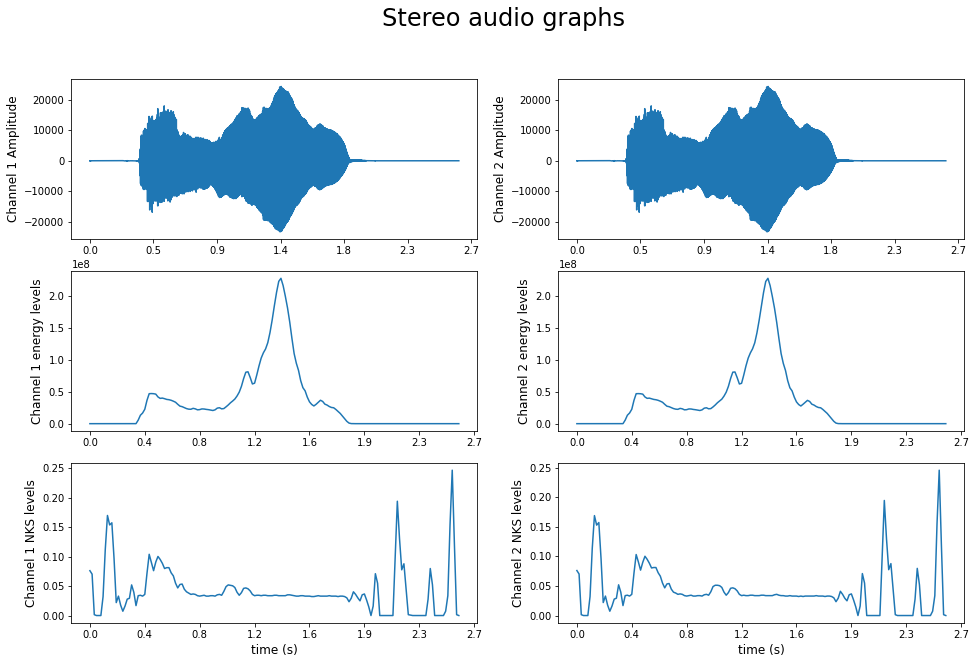

In [86]:
# Function for nks formula
def sign_func(value):
    if value >= 0:
        return 1
    else:
        return -1

half_samples_per_interval = int(sample_rate * 0.01) # Samples in half of 20 ms interval
while total_samples % half_samples_per_interval != 0:
    half_samples_per_interval += 1

intervals = []
shortened_intervals = [samples[i:i + half_samples_per_interval] for i in range(0, len(samples), half_samples_per_interval)]

for i in range(len(shortened_intervals) - 1):
    intervals.append(shortened_intervals[i] + shortened_intervals[i+1])

energy_levels = []
nks_levels = []
if number_of_channels == 1:
    for _, interval in enumerate(intervals):
        interval = [value ** 2 for value in interval]
        energy_levels.append(sum(interval) / len(interval))
    energy_levels = np.array(energy_levels)
    for _, interval in enumerate(intervals):
        nks_level = 0
        for i in range(1, len(interval)):
            nks_level += abs(sign_func(interval[i]) - sign_func(interval[i-1]))
        nks_level = nks_level / (2 * len(interval))
        nks_levels.append(nks_level)
    
    fig, ax = plt.subplots(3, 1)
    fig.set_size_inches(8, 10)
    fig.suptitle('Mono audio graphs', fontsize=24)
    
    time_axis = np.arange(0, len(samples))
    ax[0].plot(time_axis, samples)
    ax[0].set_ylabel('Amplitude', fontsize=12)
    tick_locations = ax[0].get_xticks()
    tick_labels = [round(value / sample_rate, 1) for value in tick_locations]
    ax[0].set_xticklabels(tick_labels)
    
    time_axis = np.arange(0, len(intervals))
    ax[1].plot(time_axis, energy_levels)
    ax[1].set_ylabel('Energy levels', fontsize=12)
    tick_locations = ax[1].get_xticks()
    tick_labels = [round((value / len(intervals)) * sound_duration, 1) for value in tick_locations]
    ax[1].set_xticklabels(tick_labels)
    
    ax[2].plot(time_axis, nks_levels)
    ax[2].set_ylabel('NKS levels', fontsize=12)
    ax[2].set_xlabel('time (s)', fontsize=12)
    ax[2].set_xticklabels(tick_labels)

elif number_of_channels == 2:
    for _, interval in enumerate(intervals):
        interval1 = [value1 ** 2 for (value1, value2) in interval]
        interval2 = [value2 ** 2 for (value1, value2) in interval]
        energy1 = sum(interval1) / len(interval1)
        energy2 = sum(interval2) / len(interval2)
        energy_levels.append((energy1, energy2))
    for _, interval in enumerate(intervals):
        nks_level1 = 0
        nks_level2 = 0
        for i in range(1, len(interval)):
            nks_level1 += abs(sign_func(interval[i][0]) - sign_func(interval[i-1][0]))
            nks_level2 += abs(sign_func(interval[i][1]) - sign_func(interval[i-1][1]))
        nks_level1 = nks_level1 / (2 * len(interval1))
        nks_level2 = nks_level2 / (2 * len(interval2))
        nks_levels.append((nks_level1, nks_level2))
        
    channel1_samples = [channel1_sample for (channel1_sample, channel2_sample) in samples]
    channel2_samples = [channel2_sample for (channel1_sample, channel2_sample) in samples]
    channel1_energy_levels = [channel1_energy_level for (channel1_energy_level, channel2_energy_level) in energy_levels]
    channel2_energy_levels = [channel2_energy_level for (channel1_energy_level, channel2_energy_level) in energy_levels]
    channel1_nks_levels = [channel1_nks_level for (channel1_nks_level, channel2_nks_level) in nks_levels]
    channel2_nks_levels = [channel2_nks_level for (channel1_nks_level, channel2_nks_level) in nks_levels]
    
    fig, ax = plt.subplots(3, 2)
    fig.set_size_inches(16, 10)
    fig.suptitle('Stereo audio graphs', fontsize=24)
    
    time_axis = np.arange(0, len(samples))
    ax[0][0].plot(time_axis, channel1_samples)
    ax[0][0].set_ylabel('Channel 1 Amplitude', fontsize=12)
    ax[0][1].plot(time_axis, channel2_samples)
    ax[0][1].set_ylabel('Channel 2 Amplitude', fontsize=12)
    tick_locations = ax[0][0].get_xticks()
    tick_labels = [round(value / sample_rate, 1) for value in tick_locations]
    ax[0][0].set_xticklabels(tick_labels)
    ax[0][1].set_xticklabels(tick_labels)
    
    time_axis = np.arange(0, len(intervals))
    ax[1][0].plot(time_axis, channel1_energy_levels)
    ax[1][0].set_ylabel('Channel 1 energy levels', fontsize=12)
    ax[1][1].plot(time_axis, channel2_energy_levels)
    ax[1][1].set_ylabel('Channel 2 energy levels', fontsize=12)
    tick_locations = ax[1][0].get_xticks()
    tick_labels = [round((value / len(intervals)) * sound_duration, 1) for value in tick_locations]
    ax[1][0].set_xticklabels(tick_labels)
    ax[1][1].set_xticklabels(tick_labels)
    
    ax[2][0].plot(time_axis, channel1_nks_levels)
    ax[2][1].plot(time_axis, channel2_nks_levels)
    ax[2][0].set_ylabel('Channel 1 NKS levels', fontsize=12)
    ax[2][1].set_ylabel('Channel 2 NKS levels', fontsize=12)
    ax[2][0].set_xlabel('time (s)', fontsize=12)
    ax[2][1].set_xlabel('time (s)', fontsize=12)
    ax[2][0].set_xticklabels(tick_labels)
    ax[2][1].set_xticklabels(tick_labels)
    
else:
    raise Exception("More than 2 channel audio files unsupported")
    
print(f'Audio sequence will be divided into {2 * half_samples_per_interval} length intervals')
print(f'Number of energy levels in this sample: {len(energy_levels)}, head: {energy_levels[:5]}')
print(f'Number of intervals should be around 2 times bigger than: total_samples / energy_levels')

plt.show()

Signalo energijos ir amplitudės diagramos panašios tuo, kad kinta panašiu metu. Tais laiko momentais kur amplitudės didžiausios - energijos daugiausiai. NKS diagrama labiausiai kinta, kai amplitudės reikšmės mažiausios ir energijos lygiai nedideli. Pagal NKS diagramą galima įvertinti, kada signalo amplitudė nedidelė ir energijos lygis nedidelis.

## Segmentų aptikimas sleksčio metodu

Ši celė atnaujina prieš tai atspausdintus grafikus, pridėdama vertikalias linijas tose vietose, kurios dalina signalą į fragmentus (vietos taip pat suskaičiuojamos).

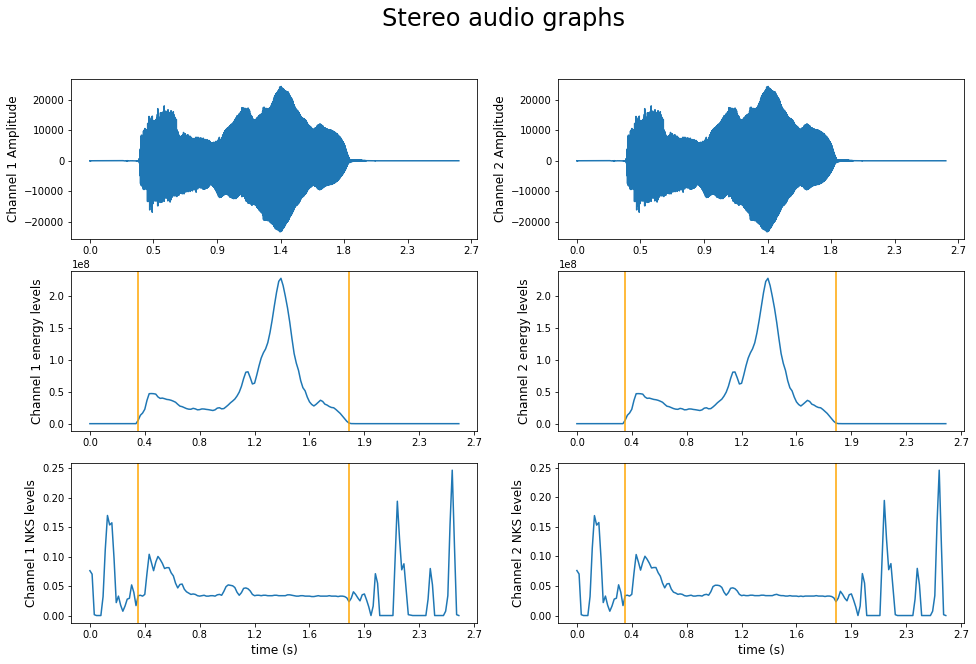

In [87]:
threshold = 1e6 # 10^6 (1000000, million) of energy units for a threshold - to differentiate signal fragments

if number_of_channels == 1:
    segment_limits = []
    for i, value in enumerate(energy_levels):
        if len(segment_limits) % 2 == 0:
            if (value >= threshold):
                segment_limits.append(i)
        else:
            if (value < threshold):
                segment_limits.append(i)
    for i, value in enumerate(segment_limits):
        ax[1].axvline(x=value, color="orange")
        ax[2].axvline(x=value, color="orange")
elif number_of_channels == 2:
    segment_limits1 = []
    segment_limits2 = []
    for i, (value1, value2) in enumerate(energy_levels):
        if len(segment_limits1) % 2 == 0:
            if (value1 >= threshold):
                segment_limits1.append(i)
        else:
            if (value1 < threshold):
                segment_limits1.append(i)
        if len(segment_limits2) % 2 == 0:
            if (value2 >= threshold):
                segment_limits2.append(i)
        else:
            if (value2 < threshold):
                segment_limits2.append(i)
    for i, value in enumerate(segment_limits1):
        ax[1][0].axvline(x=value, color="orange")
        ax[2][0].axvline(x=value, color="orange")
    for i, value in enumerate(segment_limits2):
        ax[1][1].axvline(x=value, color="orange")
        ax[2][1].axvline(x=value, color="orange")
else:
    raise Exception("More than 2 channel audio files unsupported")
    
fig # To display updated figure, that was displayed earlier. Figure is updated by adding vertical lines to segment the audio samples.

## Darbo rezultatų apibendrinimas

    1. Gautos Amplitudės, Energijos lygių ir NKS diagramos
    2. Apskaičiuotos ir pavaizduotos slenkstinės reikšmės dalinančios signalą į segmentus
    3. Signalą slenkstinės reikšmės daliną į aukštesnės energijos ir mažesnės energijos intervalus
    4. Energijos diagrama aukštesnes energijos reikšmes vaizduoja tuose laiko momentuose, kur ir signalo amplitudės reikšmės aukštos
    5. NKS lygiai (pagal diagramą) įgyja stabilesnes reikšmes, kai signalo amplitudė ir energija įgyja aukštesnes reikšmes